## Odd momentum

In [90]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, time
import warnings
warnings.filterwarnings("ignore")

def remove_empty_rows(df):
    df = df[(~df.total_corner.isna()) & (df.total_corner!="---") & (df.total_corner!=" ---")]
    df = df[(~df.chl_line.isna()) & (df.chl_line!="---")]
    df = df[(~df.chl_hi.isna()) & (df.chl_hi!="---")]
    df = df[(~df.chl_low.isna()) & (df.chl_low!="---")]

    df['total_corner'] = df['total_corner'].apply(pd.to_numeric)
    df['chl_line'] = df['chl_line'].apply(pd.to_numeric)
    df['chl_hi'] = df['chl_hi'].apply(pd.to_numeric)
    df['chl_low'] = df['chl_low'].apply(pd.to_numeric)
    return df

event_id = '20200219WED16'
os.chdir('/Users/TysonWu/dev/odds-crawl-app/odds-crawl-app/development/')
data = pd.read_csv('data_collection/data/'+event_id+'.csv')
data = remove_empty_rows(data)

,event_id,timestamp,minutes,total_corner,home_score,away_score,chl_line,chl_hi,chl_low
0,20200219WED16,2020-02-20 11:35:31,0:35:31,0,0,0,6.5,2.04,1.69
1,20200219WED16,2020-02-20 11:35:31,0:35:31,0,0,0,7.5,2.75,1.39
2,20200219WED16,2020-02-20 11:35:41,0:35:41,0,0,0,6.5,2.04,1.69
3,20200219WED16,2020-02-20 11:35:41,0:35:41,0,0,0,7.5,2.75,1.39
4,20200219WED16,2020-02-20 11:35:52,0:35:52,0,0,0,6.5,2.04,1.69
...,...,...,...,...,...,...,...,...,...
818,20200219WED16,2020-02-20 12:49:25,1:49:25,5,1,0,6.5,3.55,1.25
819,20200219WED16,2020-02-20 12:49:35,1:49:35,5,1,0,6.5,4.00,1.20
820,20200219WED16,2020-02-20 12:49:45,1:49:45,5,1,0,6.5,4.00,1.20
821,20200219WED16,2020-02-20 12:49:55,1:49:55,5,1,0,6.5,4.00,1.20


In [92]:
# momentum
for line in lines:
    data_dict[line]['hi_change'] = data_dict[line].chl_hi/data_dict[line].chl_hi.shift(1)
    data_dict[line]['low_change'] = data_dict[line].chl_low/data_dict[line].chl_low.shift(1)
    data_dict[line] = data_dict[line][(data_dict[line].hi_change != 1) | (data_dict[line].low_change != 1)]
    data_dict[line] = data_dict[line][~data_dict[line]['chl_line'].isna()]

{3.5:                 minutes  chl_line  chl_hi  chl_low  hi_change  low_change
 279 2020-02-19 01:23:18       3.5    1.54     2.30        NaN         NaN
 285 2020-02-19 01:24:19       3.5    1.64     2.12   1.064935    0.921739
 291 2020-02-19 01:25:20       3.5    1.74     1.97   1.060976    0.929245
 297 2020-02-19 01:26:20       3.5    1.81     1.89   1.040230    0.959391
 303 2020-02-19 01:27:21       3.5    1.88     1.82   1.038674    0.962963
 334 2020-02-19 01:33:45       3.5    1.47     2.48        NaN         NaN
 338 2020-02-19 01:34:26       3.5    1.52     2.35   1.034014    0.947581
 343 2020-02-19 01:35:16       3.5    1.57     2.25   1.032895    0.957447
 349 2020-02-19 01:36:17       3.5    1.65     2.10   1.050955    0.933333
 355 2020-02-19 01:37:18       3.5    1.72     2.00   1.042424    0.952381,
 4.5:                 minutes  chl_line  chl_hi  chl_low  hi_change  low_change
 222 2020-02-19 01:13:41       4.5    1.62     2.15        NaN         NaN
 229 2020-02-1

# Another approach

Plot the graph of all-time lowest odd ie. all-time highest implied probability

### Generate signal list

In [13]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, time
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def remove_empty_rows(df):
    try:
        df = df[(~df.total_corner.isna()) & (df.total_corner!="---") & (df.total_corner!=" ---")]
    except:
        pass
    df = df[(~df.chl_line.isna()) & (df.chl_line!="---")]
    df = df[(~df.chl_hi.isna()) & (df.chl_hi!="---")]
    df = df[(~df.chl_low.isna()) & (df.chl_low!="---")]
    
    try:
        df['total_corner'] = df['total_corner'].apply(pd.to_numeric)
    except:
        pass
    df['chl_line'] = df['chl_line'].apply(pd.to_numeric)
    df['chl_hi'] = df['chl_hi'].apply(pd.to_numeric)
    df['chl_low'] = df['chl_low'].apply(pd.to_numeric)
    return df


def lowest_odd(x): # x is a 2D list [[a,b,c],[a,b,c],[a,b,c]] 1-3 elements
    odd = 99
    i = 0
    for pos, list in enumerate(x):
        if list[-1] <= odd:
            odd = list[-1]
            i = pos
    return x[i]


def graph(data):
    # graph the peaks
    fig=plt.figure(figsize=(18, 6))
    plt.plot(data.minutes, data.chl_low)
    plt.title(event_id)
    plt.show()


# event_id = '20200219WED1'
os.chdir('/Users/TysonWu/dev/odds-crawl-app/odds-crawl-app/development/')

signal_list = None

for event_id in [file[:-4] for file in os.listdir('data_collection/data/') if '2020' in file]:
    # data pipeline
    data = pd.read_csv('data_collection/data/'+event_id+'.csv')
    data = data[['event_id','minutes','chl_line','chl_hi','chl_low']]
    data = remove_empty_rows(data)
    data['line_odds'] = data.apply(lambda x: [x.chl_line, x.chl_hi, x.chl_low], axis = 1)
    odd_list = data[['minutes', 'line_odds']].groupby('minutes')['line_odds'].apply(list).reset_index(name='line_odds')
    data = odd_list.merge(data[['event_id','minutes']], how='inner', on='minutes')
    data = data[['event_id', 'minutes', 'line_odds']]
    
    data['min_odds_info'] = data.line_odds.apply(lowest_odd)
    data['line'] = data.min_odds_info.apply(lambda x: x[0])
    data['chl_low'] = data.min_odds_info.apply(lambda x: x[-1])
    data = data[['event_id','minutes','line','chl_low']]
    data['minutes'] = data['minutes'].apply(lambda x: datetime.strptime(event_id[:8]+x, "%Y%m%d%H:%M:%S"))
    
    # graph data
    # graph(data)
    
    # signals
    data['odd_change'] = data.chl_low/data.chl_low.shift(1)
    data['peak'] = np.where(data.odd_change > 1, 1, 0)
    peaks = data[data.peak == 1]
    peaks['peak_change'] = peaks.chl_low/peaks.chl_low.shift(1)
    peaks['signal'] = np.where(peaks.peak_change < 1, 1, 0)
    peaks = peaks[peaks.minutes >= datetime.combine(datetime.strptime(event_id[:8],"%Y%m%d"), time(1,20,0))]
    
    if signal_list is None:
        signal_list = peaks
    else:
        if peaks.empty == False:
            signal_list = pd.concat([signal_list, peaks.iloc[[0]]], ignore_index=True)
signal_list

,event_id,minutes,line,chl_low,odd_change,peak,peak_change,signal
0,20200217MON12,2020-02-17 01:25:52,7.5,1.56,1.258065,1,0.968944,1
1,20200217MON12,2020-02-17 01:36:59,6.5,1.46,1.258621,1,0.935897,1
2,20200217MON10,2020-02-17 01:26:34,16.5,1.50,1.239669,1,0.993377,1
3,20200218TUE1,2020-02-18 01:23:59,15.5,1.52,1.256198,1,0.993464,1
4,20200214FRI29,2020-02-14 01:20:49,7.5,1.49,1.241667,1,0.973856,1
5,20200218TUE2,2020-02-18 01:28:46,10.5,1.23,1.025000,1,0.773585,1
6,20200218TUE3,2020-02-18 01:27:02,14.5,1.50,1.250000,1,0.967742,1
7,20200218TUE20,2020-02-18 01:29:13,10.5,1.50,1.250000,1,0.961538,1
8,20200215SAT3,2020-02-15 01:25:13,14.5,1.55,1.192308,1,0.981013,1
9,20200218TUE18,2020-02-18 01:21:42,9.5,1.54,1.252033,1,0.956522,1


### Merge with result

In [16]:
result = pd.read_csv('result_collection/match_corner_result.csv')
signals = signal_list.merge(result[['event_id', 'result_corner']], how='inner', on='event_id')
signals.head()

,event_id,minutes,line,chl_low,odd_change,peak,peak_change,signal,result_corner
0,20200217MON12,2020-02-17 01:25:52,7.5,1.56,1.258065,1,0.968944,1,4.0
1,20200217MON12,2020-02-17 01:36:59,6.5,1.46,1.258621,1,0.935897,1,4.0
2,20200217MON10,2020-02-17 01:26:34,16.5,1.50,1.239669,1,0.993377,1,13.0
3,20200218TUE1,2020-02-18 01:23:59,15.5,1.52,1.256198,1,0.993464,1,15.0
4,20200214FRI29,2020-02-14 01:20:49,7.5,1.49,1.241667,1,0.973856,1,10.0


In [ ]:
signals['correct_prediction'] = np.where(signals.line > signals.result_corner, 1, 0)
signals['return'] = np.where(signals.correct_prediction == 1, 
                             (signals.chl_low-1)*signals.signal, 
                             -1*signals.signal)
signals

### Return

In [15]:
signals['return'].sum()

0.9699999999999998

## Altogether

In [34]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, time, date
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
os.chdir('/Users/TysonWu/dev/odds-crawl-app/odds-crawl-app/development/')
sns.set()


def remove_empty_rows(df):
    try:
        df = df[(~df.total_corner.isna()) & (df.total_corner!="---") & (df.total_corner!=" ---")]
    except:
        pass
    df = df[(~df.chl_line.isna()) & (df.chl_line!="---")]
    df = df[(~df.chl_hi.isna()) & (df.chl_hi!="---")]
    df = df[(~df.chl_low.isna()) & (df.chl_low!="---")]
    
    try:
        df['total_corner'] = df['total_corner'].apply(pd.to_numeric)
    except:
        pass
    df['chl_line'] = df['chl_line'].apply(pd.to_numeric)
    df['chl_hi'] = df['chl_hi'].apply(pd.to_numeric)
    df['chl_low'] = df['chl_low'].apply(pd.to_numeric)
    return df


def lowest_odd(x): # x is a 2D list [[a,b,c],[a,b,c],[a,b,c]] 1-3 elements
    odd = 99
    i = 0
    for pos, list in enumerate(x):
        if list[-1] <= odd:
            odd = list[-1]
            i = pos
    return x[i]


def graph(data):
    # graph the peaks
    fig=plt.figure(figsize=(18, 6))
    plt.plot(data.minutes, data.chl_low)
    plt.title(event_id)
    plt.show()


# t takes datetime.time, which is the restricted min. bet time
# min peak change [0,1] float. Recommend 0.95 to 1
def momentum_analysis(t, min_peak_change): 
    signal_list = None
    for event_id in [file[:-4] for file in os.listdir('data_collection/data/') if '2020' in file]:
        # data pipeline
        data = pd.read_csv('data_collection/data/'+event_id+'.csv')
        data = data[['event_id','minutes','chl_line','chl_hi','chl_low']]
        data = remove_empty_rows(data)
        data['line_odds'] = data.apply(lambda x: [x.chl_line, x.chl_hi, x.chl_low], axis = 1)
        odd_list = data[['minutes', 'line_odds']].groupby('minutes')['line_odds'].apply(list).reset_index(name='line_odds')
        data = odd_list.merge(data[['event_id','minutes']], how='inner', on='minutes')
        data = data[['event_id', 'minutes', 'line_odds']]

        data['min_odds_info'] = data.line_odds.apply(lowest_odd)
        data['line'] = data.min_odds_info.apply(lambda x: x[0])
        data['chl_low'] = data.min_odds_info.apply(lambda x: x[-1])
        data = data[['event_id','minutes','line','chl_low']]
        data['minutes'] = data['minutes'].apply(lambda x: datetime.strptime(event_id[:8]+x, "%Y%m%d%H:%M:%S"))

        # graph data
        # graph(data)

        # signals
        data['odd_change'] = data.chl_low/data.chl_low.shift(1)
        data['peak'] = np.where(data.odd_change > 1, 1, 0)
        peaks = data[data.peak == 1]
        peaks['peak_change'] = peaks.chl_low/peaks.chl_low.shift(1)
        peaks['signal'] = np.where(peaks.peak_change < min_peak_change, 1, 0)
        # restriction
        peaks = peaks[peaks.minutes >= datetime.combine(datetime.strptime(event_id[:8],"%Y%m%d"), t)]

        if signal_list is None:
            if peaks.empty == False:
                signal_list = peaks.iloc[[0]]
        else:
            if peaks.empty == False:
                signal_list = pd.concat([signal_list, peaks.iloc[[0]]], ignore_index=True)

    result = pd.read_csv('result_collection/match_corner_result.csv')
    signals = signal_list.merge(result[['event_id', 'result_corner']], how='inner', on='event_id')
    signals['correct_prediction'] = np.where(signals.line > signals.result_corner, 1, 0)
    signals['return'] = np.where(signals.correct_prediction == 1, 
                                 (signals.chl_low-1)*signals.signal, 
                                 -1*signals.signal)
    return signals


### Search for optimal bet restrict time

100%|██████████| 36/36 [02:00<00:00,  3.35s/it]


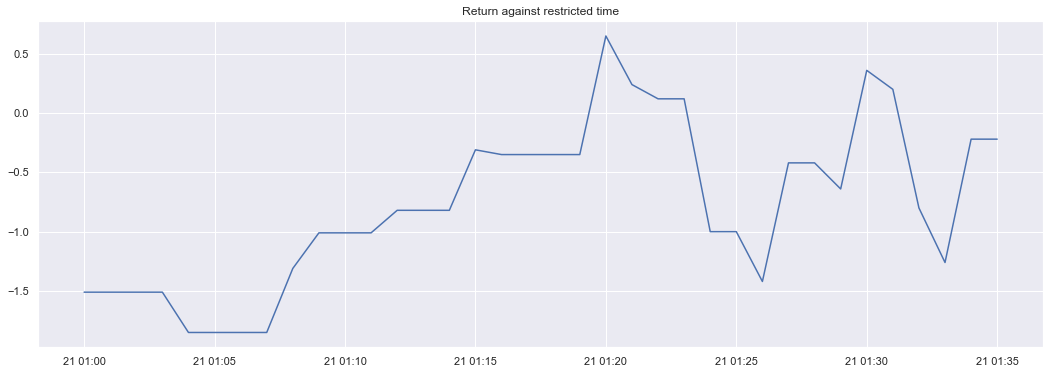

In [54]:
from tqdm import tqdm
from datetime import date
os.chdir('/Users/TysonWu/dev/odds-crawl-app/odds-crawl-app/development/')

# timelist = [time(0,i,0) for i in range(60)] + [time(1,i,0) for i in range(36)]
timelist = [time(1,i,0) for i in range(36)]
pnl = []
for times in tqdm(timelist):
    signal = momentum_analysis(t=times, min_peak_change=1)
    pnl.append(signal['return'].sum()) # t takes datetime.time

fig=plt.figure(figsize=(18, 6))
plt.plot([datetime.combine(date.today(), time)for time in timelist], pnl)
plt.title('Return against restricted time')
plt.show()

### Search for optimal min peak change

100%|██████████| 15/15 [00:48<00:00,  3.21s/it]


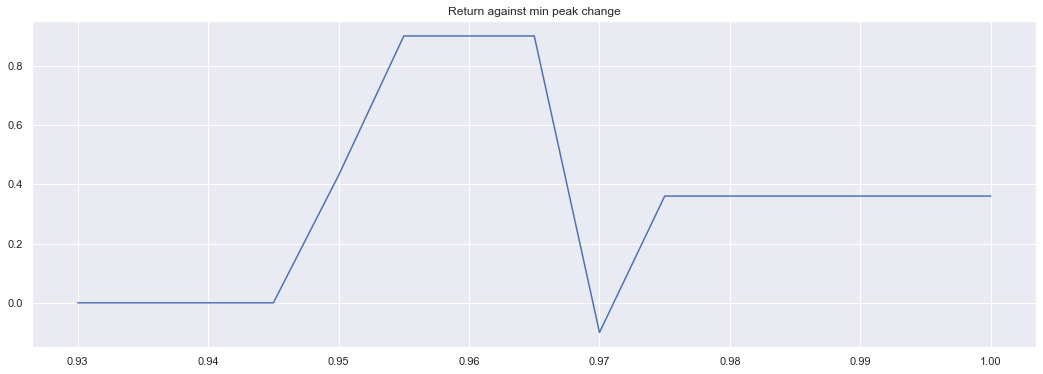

In [55]:
os.chdir('/Users/TysonWu/dev/odds-crawl-app/odds-crawl-app/development/')

# timelist = [time(0,i,0) for i in range(60)] + [time(1,i,0) for i in range(36)]
changes = np.linspace(0.93,1.00,15)
times = time(1,30,0)
pnl = []
for change in tqdm(changes):
    signal = momentum_analysis(t=times, min_peak_change=change)
    pnl.append(signal['return'].sum()) # t takes datetime.time

fig=plt.figure(figsize=(18, 6))
plt.plot(changes, pnl)
plt.title('Return against min peak change')
plt.show()

### Profit over time

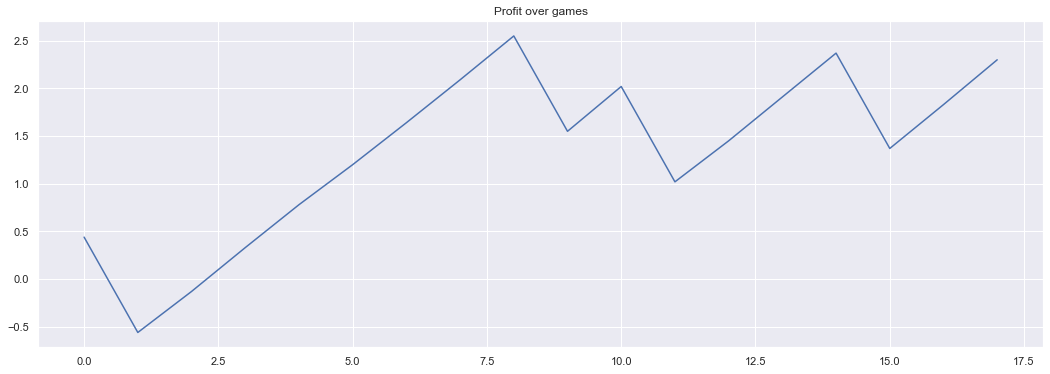

## Signals Rules

Rules:
1. Signal after t mins after halftime (t is to be determined)
2. Bet instantly when next low prob peak occurs
3. Peak value changes to a lower odd from peak to peak

In [99]:
data['odd_change'] = data.chl_low/data.chl_low.shift(1)
data['peak'] = np.where(data.odd_change > 1, 1, 0)
peaks = data[data.peak == 1]
peaks['peak_change'] = peaks.chl_low/peaks.chl_low.shift(1)
peaks['peak_change_sign'] = np.where(peaks.peak_change < 1, 1, 0)
peaks = peaks[peaks.minutes >= datetime.combine(datetime.strptime(event_id[:8],"%Y%m%d"), time(1,30,0))]

In [100]:
peaks

,minutes,line,chl_low,odd_change,peak,peak_change,peak_change_sign
511,2020-02-19 01:36:19,3.5,1.49,1.342342,1,1.020548,0
